In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [299]:
df = pd.read_csv('AmesHousing.tsv', delimiter="\t")

In [272]:
def transform_features(df):
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Use only numerical columns 
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

57088.251612639091

### Feature Engineering - Handle missing values

1: All columns: Drop any column with 5% or more missing values for now.

In [273]:
value_missing_cols = df.isnull().sum()
# Filter Series to columns which is >5% missing values
dropped_columns = value_missing_columns[(value_missing_cols > len(df)/20)].sort_values()
# Drop those columns from the data frame
df = df.drop(dropped_columns.index, axis=1)

2: Text columns: Drop any column with 1 or more missing values for now.

In [274]:
# Filter Series to text columns with missing value
text_missing_cols = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
dropped_columns_2 = text_missing_cols[text_missing_cols > 0]
# Drop thos columns from the data frame
df = df.drop(dropped_columns_2.index, axis=1)

3: Numerical columns: For columns with missing values, fill in with the most common value in that column

In [275]:
# Compute column-wise missing value counts
num_missing_cols = df.select_dtypes(include=['int', 'float']).isnull().sum()
fix_num_columns = num_missing_cols[(num_missing_cols < len(df)/20) & (num_missing_cols > 0)].sort_values()
fix_num_columns

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [276]:
# Compute the most common value for each column in fix_num_columns
replacement_values_dict = df[fix_num_columns.index].mode().to_dict(orient='records')[0]
replacement_values_dict

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [277]:
# Replace missing values
df = df.fillna(replacement_values_dict)

In [278]:
# Verify every column has 0 missing value

In [279]:
df.isnull().sum().value_counts()

0      64
490     1
159     1
dtype: int64

In [280]:
# What new features can we create, that better capture the information in some of the features?
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [281]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [282]:
# Create new columns
df['Years Before Sale'] = years_sold
df['Years Since Remodel'] = years_since_remod

# Drop rows with negative values
df = df.drop([1702, 2180, 2181], axis=0)
# Drop original year columns
df = df.drop(['Year Built','Year Remod/Add'], axis=1)

In [267]:
# Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1)
# Drop columns thats leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

## Update transform_features(df) function with Feature Engineering

In [300]:
def transform_features(df):
    value_missing_cols = df.isnull().sum()
    # Filter Series to columns which is >5% missing values
    dropped_columns = value_missing_cols[(value_missing_cols > len(df)/20)].sort_values()
    # Drop those columns from the data frame
    df = df.drop(dropped_columns.index, axis=1)
    # Filter Series to text columns with missing value
    text_missing_cols = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    dropped_columns_2 = text_missing_cols[text_missing_cols > 0]
    # Drop thos columns from the data frame
    df = df.drop(dropped_columns_2.index, axis=1)
    # Compute column-wise missing value counts
    num_missing_cols = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fix_num_columns = num_missing_cols[(num_missing_cols < len(df)/20) & (num_missing_cols > 0)].sort_values()
    # Compute the most common value for each column in fix_num_columns
    replacement_values_dict = df[fix_num_columns.index].mode().to_dict(orient='records')[0]
    # Replace missing values
    df = df.fillna(replacement_values_dict)
    # Verify every column has 0 missing value
    df.isnull().sum().value_counts()
    # What new features can we create, that better capture the information in some of the features?
    years_sold = df['Yr Sold'] - df['Year Built']
    years_sold[years_sold < 0]
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    # Create new columns
    df['Years Before Sale'] = years_sold
    df['Years Since Remodel'] = years_since_remod

    # Drop rows with negative values
    df = df.drop([1702, 2180, 2181], axis=0)
    # Drop original year columns
    df = df.drop(['Year Built','Year Remod/Add'], axis=1)
    
    # Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)
    # Drop columns thats leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Use only numerical columns 
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.367312413066

## Generate a correlation heatmap matrix of the numerical features in the training data set

In [301]:
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
corr_matrix = numerical_df.corr()
sorted_corrs = corr_matrix["SalePrice"].abs().sort_values()
print(sorted_corrs)

BsmtFin SF 2           0.006127
Misc Val               0.019273
3Ssn Porch             0.032268
Bsmt Half Bath         0.035875
Low Qual Fin SF        0.037629
Pool Area              0.068438
MS SubClass            0.085128
Overall Cond           0.101540
Screen Porch           0.112280
Kitchen AbvGr          0.119760
Enclosed Porch         0.128685
Bedroom AbvGr          0.143916
Bsmt Unf SF            0.182751
Lot Area               0.267520
2nd Flr SF             0.269601
Bsmt Full Bath         0.276258
Half Bath              0.284871
Open Porch SF          0.316262
Wood Deck SF           0.328183
BsmtFin SF 1           0.439284
Fireplaces             0.474831
TotRms AbvGrd          0.498574
Mas Vnr Area           0.506983
Years Since Remodel    0.534985
Full Bath              0.546118
Years Before Sale      0.558979
1st Flr SF             0.635185
Garage Area            0.641425
Total Bsmt SF          0.644012
Garage Cars            0.648361
Gr Liv Area            0.717596
Overall 

In [302]:
# Let's only keep columns with a correlation coefficient of larger than 0.4

In [303]:
strong_corrs = sorted_corrs[sorted_corrs > 0.4]
print(strong_corrs)

BsmtFin SF 1           0.439284
Fireplaces             0.474831
TotRms AbvGrd          0.498574
Mas Vnr Area           0.506983
Years Since Remodel    0.534985
Full Bath              0.546118
Years Before Sale      0.558979
1st Flr SF             0.635185
Garage Area            0.641425
Total Bsmt SF          0.644012
Garage Cars            0.648361
Gr Liv Area            0.717596
Overall Qual           0.801206
SalePrice              1.000000
Name: SalePrice, dtype: float64


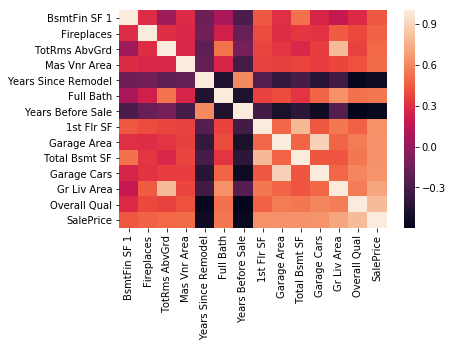

In [307]:
%matplotlib inline
corr_matrix = numerical_df[strong_corrs.index].corr()
sns.heatmap(corr_matrix)